In [1]:
library(ggplot2)
library(plyr)
#load("C:/Users/6609/Documents/data.rData")
coffeechain <- read.csv("data/coffeechain.csv")

In [2]:
str(coffeechain)

'data.frame':	4248 obs. of  19 variables:
 $ Date          : Factor w/ 24 levels "2012/1/1 上午 12:00:00",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Market        : Factor w/ 4 levels "Central","East",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Market.Size   : Factor w/ 2 levels "Major Market",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Product       : Factor w/ 13 levels "Amaretto","Caffe Latte",..: 1 5 8 10 3 7 4 11 12 6 ...
 $ Product.Type  : Factor w/ 4 levels "Coffee","Espresso",..: 1 1 1 4 2 2 3 3 3 4 ...
 $ State         : Factor w/ 20 levels "California","Colorado",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Type          : Factor w/ 2 levels "Decaf","Regular": 2 2 1 2 2 1 1 1 1 2 ...
 $ Area.Code     : int  719 970 970 303 303 720 970 719 970 719 ...
 $ Budget.COGS   : int  90 80 100 30 60 80 140 50 50 40 ...
 $ Budget.Margin : int  130 110 140 50 90 130 160 80 70 70 ...
 $ Budget.Profit : int  100 80 110 30 70 80 110 20 40 20 ...
 $ Budget.Sales  : Factor w/ 89 levels "0","1,110","1,130",..: 19 15 21 79 11 18 28 9 8 7 ...
 $ CO

In [6]:
#class(Budge.Profit) : factor, cannot draw a bullet chart
#So, we have to change type to numeric
#Because of factor have a key point :levels, cannot only use as.numeric
coffeechain$Budget.Sales <- as.numeric(levels(coffeechain$Budget.Sales))[coffeechain$Budget.Sales]

Warning message:
In eval(expr, envir, enclos): 強制變更過程中產生了 NA

In [8]:
#to find where is the value of na
coffeechain_na <- subset(coffeechain, is.na(Budget.Sales))
coffeechain_na

,Date,Market,Market.Size,Product,Product.Type,State,Type,Area.Code,Budget.COGS,Budget.Margin,Budget.Profit,Budget.Sales,COGS,Inventory,Margin,Marketing,Profit,Sales,Total.Expenses
1023,2012/6/1 上午 12:00:00,West,Major Market,Colombian,Coffee,California,Regular,805,440,670,500,NA,356,"2,476",534,124,357,890,177
1197,2012/7/1 上午 12:00:00,West,Major Market,Colombian,Coffee,California,Regular,707,450,690,530,NA,364,"2,654",548,127,370,912,178
1374,2012/8/1 上午 12:00:00,West,Major Market,Colombian,Coffee,California,Regular,650,450,680,520,NA,364,"2,617",546,127,368,910,178
3153,2013/6/1 上午 12:00:00,West,Major Market,Colombian,Coffee,California,Regular,530,440,670,500,NA,356,"2,476",534,124,493,882,165
3327,2013/7/1 上午 12:00:00,West,Major Market,Colombian,Coffee,California,Regular,650,450,690,530,NA,364,"2,654",548,127,511,904,166
3504,2013/8/1 上午 12:00:00,West,Major Market,Colombian,Coffee,California,Regular,213,450,680,520,NA,364,"2,617",546,127,508,902,166


In [9]:
#fill the na gap
coffeechain$Budget.Sales[1023] <- 1100
coffeechain$Budget.Sales[1197] <- 1140
coffeechain$Budget.Sales[1374] <- 1130
coffeechain$Budget.Sales[3153] <- 1110
coffeechain$Budget.Sales[3327] <- 1140
coffeechain$Budget.Sales[3504] <- 1130

In [16]:
coffee_bullet <- ddply(coffeechain,c("Type","Market"),summarise,sales = sum(Sales),budget_sales = sum(Budget.Sales))
head(coffee_bullet)

Type,Market,sales,budget_sales
Decaf,Central,118528,111160
Decaf,East,55343,42180
Decaf,South,52654,49100
Decaf,West,121099,110780
Regular,Central,146517,139200
Regular,East,123233,115720


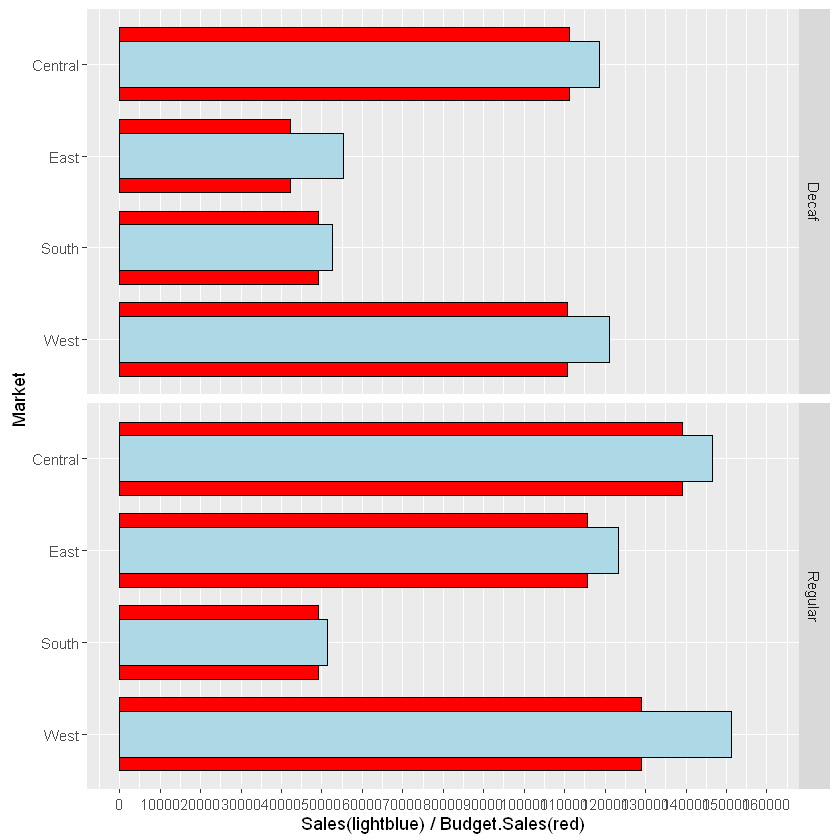

In [19]:
#multiplot chart way 1
ggplot(coffee_bullet,aes(x=Market,y=sales)) + geom_bar(
    aes(y=budget_sales), width = 0.8, stat = "identity", fill="red", colour="black") + geom_bar(
    width=0.5,stat="identity", fill="lightblue", colour="black") +scale_x_discrete(
    limits=rev(levels(coffee_bullet$Market))) + scale_y_continuous(
    limits=c(0, 160000), breaks=seq(0,160000,10000)) + ylab(
    "Sales(lightblue) / Budget.Sales(red)") + coord_flip() + facet_grid(Type ~ .)

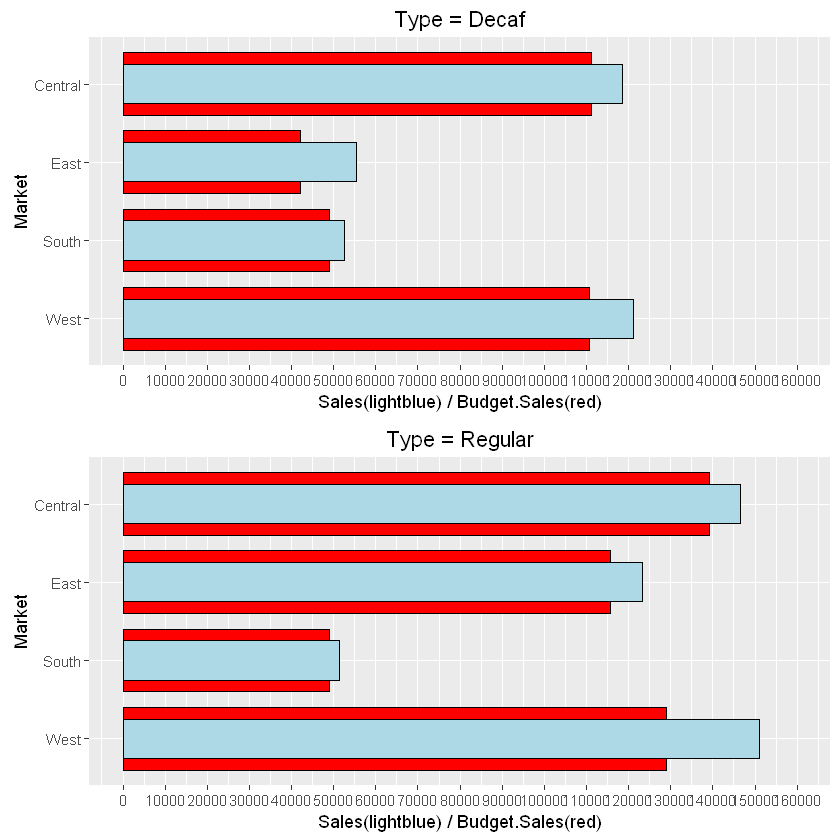

In [21]:
#multiplot chart way 2
source("function/multiplot.R")
decaf <- ggplot(coffee_bullet[1:4,],aes(x=Market,y=sales)) + geom_bar(
    aes(y=budget_sales), width = 0.8, stat = "identity", fill="red", colour="black") + geom_bar(
    width=0.5,stat="identity", fill="lightblue", colour="black") +scale_x_discrete(
    limits=rev(levels(coffee_bullet$Market))) + scale_y_continuous(
    limits=c(0, 160000), breaks=seq(0,160000,10000)) + ylab(
    "Sales(lightblue) / Budget.Sales(red)") + coord_flip() + ggtitle("Type = Decaf")

regular <- ggplot(coffee_bullet[5:8,],aes(x=Market,y=sales)) + geom_bar(
    aes(y=budget_sales), width = 0.8, stat = "identity", fill="red", colour="black") + geom_bar(
    width=0.5,stat="identity", fill="lightblue", colour="black") +scale_x_discrete(
    limits=rev(levels(coffee_bullet$Market))) +scale_y_continuous(
    limits=c(0, 160000), breaks=seq(0,160000,10000)) + ylab(
    "Sales(lightblue) / Budget.Sales(red)") + coord_flip() + ggtitle("Type = Regular")

multiplot(decaf, regular, cols=1) 